In [239]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cst
# import astropy
# from astropy.cosmology import WMAP9 as cosmo

In [265]:
def dTb_function(z, h, Tr, Ts, xH1, omega_b, omega_m):
    dTb = 27*xH1*(omega_b*h**2/0.023)*np.sqrt((0.15/omega_m*h**2)*((1+z)/10))*((Ts-Tr_z)/Ts)
    return dTb

In [266]:
def Ts_func_1(z, z_dec, Tr): #simplified model - assumes only collisions 
    Tr_z_dec = Tr*(1+z_dec)
    Tk_z_dec = Tr_z_dec
    Tk_here = Tk_z_dec*(1*z)**2/((1+z_dec)**2)
    Ts_here = Tk_here
    return Ts_here

In [267]:
def Ts_func_2(z, z_dec, Tr): #simplified model - assumes collisions + radiative
    xc_z_dec = 10
    Tr_z_dec = Tr*(1+z_dec)
    Tr_z = Tr*(1+z)
    Tk_z_dec = Tr_z_dec
    xc_here = xc_z_dec*(1+z)**3/(1+z_dec)**3
    Tk_here = Tk_z_dec*(1*z)**2/((1+z_dec)**2)
    Ts_here = 1/((xc_here*(1/Tk_here) + (1/Tr_z))/(1+xc_here))
    return Ts_here

In [268]:
omega_b = 0.0486 #Baryon
omega_c = 0.2589 #CDM
omega_m = 0.3089 #Matter
omega_lambda = 0.6911
H0 = 67.74 #Hubbles constant
h = H0/100.0
Tr = 2.725 #Radiation temperature CMB
z_dec = 180 #memory reading Peebles

In [269]:
freq = np.linspace(8,200,1000)
z = (1420/freq)-1

In [270]:
xH1 = 1.0 #Fully neutral Hydrogen gas

#z = 10.0 #Assuming redshift of ten
#Ts = 0.00001 #Just assumption

In [274]:
#Ts_z = Ts_func_1(z, z_dec, Tr)
Ts_z = Ts_func_2(z, z_dec, Tr)
Tr_z = Tr*(1+z)
dTb_1 = dTb_function(z, h, Tr_z, Ts_z, xH1, omega_b, omega_m)

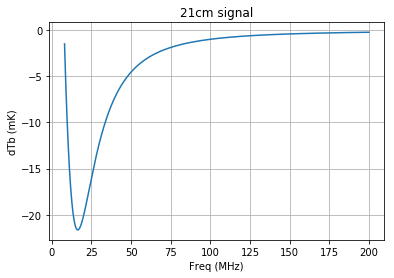

In [275]:
plt.plot(freq, dTb_1)
plt.title("21cm signal")
plt.xlabel("Freq (MHz)")
plt.ylabel("dTb (mK)")
plt.grid()

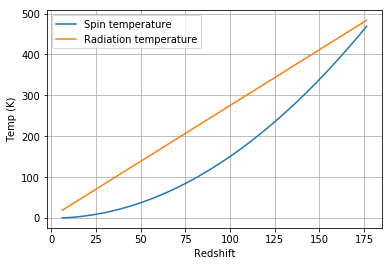

In [273]:
plt.plot(z,Ts_z, label="Spin temperature")
plt.plot(z,Tr_z, label="Radiation temperature")
plt.xlabel("Redshift")
plt.ylabel("Temp (K)")
plt.grid()
plt.legend()